In [ ]:
Q1.

In [22]:
import pandas as pd
data = pd.read_csv("307data.csv")
df.info()

# Check the data types of each column in the dataframe
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 203 entries, d 5100-0 to d 571-9
dtypes: int64(203)
memory usage: 111.1 KB
d 5100-0    int64
d 5100-1    int64
d 5100-2    int64
d 5100-3    int64
d 5100-4    int64
            ...  
d 571-2     int64
d 571-3     int64
d 571-4     int64
d 571-8     int64
d 571-9     int64
Length: 203, dtype: object


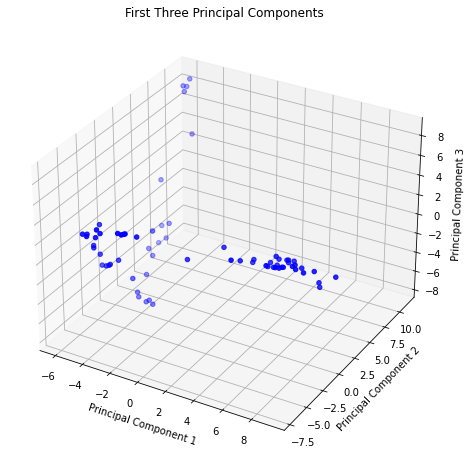

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_data(filename):
    return pd.read_csv(filename)

def preprocess_data(data, target_col):
    X = data.drop(columns=[target_col])
    X_encoded = pd.get_dummies(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)
    return X_scaled

def apply_pca(X_scaled, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)
    return principal_components

def plot_first_three_components(principal_components):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='b', marker='o')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('First Three Principal Components')
    plt.show()

def main():
    filename = "307data.csv"
    target_col = "Classes"
    n_components = 10
    
    data = load_data(filename)
    X_scaled = preprocess_data(data, target_col)
    principal_components = apply_pca(X_scaled, n_components)
    plot_first_three_components(principal_components)

if __name__ == "__main__":
    main()


In [ ]:
Q2.

In [40]:
print("Explained Variance Ratios:")
explained_variance_ratios = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratios[:5]):
    print(f"Principal Component {i+1}: {ratio:.4f}")

explained_variance_ratios = pca.explained_variance_ratio_

cumulative_variance_first_5 = sum(explained_variance_ratios[:5]) * 100

print(f"The first 5 principal components cover {cumulative_variance_first_5:.2f}% of the total variance.")


Explained Variance Ratios:
Principal Component 1: 0.1888
Principal Component 2: 0.1403
Principal Component 3: 0.0929
Principal Component 4: 0.0555
Principal Component 5: 0.0462
The first 5 principal components cover 52.36% of the total variance.


In [ ]:
Q3.

In [41]:
import numpy as np

first_5_pcs = principal_components[:, :5]

correlation_matrix = np.corrcoef(first_5_pcs, rowvar=False)

print(correlation_matrix)

[[ 1.00000000e+00  1.33646086e-16  2.13555595e-16  4.78081774e-17
   6.98776647e-17]
 [ 1.33646086e-16  1.00000000e+00 -1.39751842e-16  1.31464021e-16
  -1.03581508e-16]
 [ 2.13555595e-16 -1.39751842e-16  1.00000000e+00  2.12088724e-16
  -3.73653900e-17]
 [ 4.78081774e-17  1.31464021e-16  2.12088724e-16  1.00000000e+00
  -1.98692193e-16]
 [ 6.98776647e-17 -1.03581508e-16 -3.73653900e-17 -1.98692193e-16
   1.00000000e+00]]
